# Publication Performance Analysis in National Taipei University
### Note: For privacy, the original dataset won't be revealed
## Table of Contents:

* [Introduction](#Introduction)
* [Data Manipulation](#data-manipulation)
* [Correlation Matrix](#correlation-matrix)
* [PCA](#pca)
* [Result](#result)

## Introduction <a class = "anchor" id = "introduction"></a>
#### In this notebook, we want to analyze the publication performance in National Taipei University (NTPU) through using principal component analysis (PCA)
First, let's have a look of what our data looks like.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:

data = pd.read_csv("D:\\Dropbox\\wave\\projects\\scival QS research\\qs\\m_data.csv")
data[:5]

,Unnamed: 0.1,Unnamed: 0,Entity,Tags,Views Count,Citation Count,Field-Weighted Citation Impact,Scholarly Output,Academic-Corporate Collaboration (%),Citations per Publication,International Collaboration (%),Unnamed: 9,subject,field
0,0,0,Center for General Education,NaN,-,-,-,0.0,-,-,-,NaN,Social Science & Management,Accounting & Finance
1,1,1,Department of Accountancy,NaN,1006,68,1.10,25.0,0.0,2.7,36.0,NaN,Social Science & Management,Accounting & Finance
2,2,2,Department of Business Administration,NaN,1302,199,0.62,42.0,0.0,4.7,35.7,NaN,Social Science & Management,Accounting & Finance
3,3,3,Department of Chinese Literature,NaN,-,-,-,0.0,-,-,-,NaN,Social Science & Management,Accounting & Finance
4,4,4,Department of Communication Engineering,NaN,-,-,-,0.0,-,-,-,NaN,Social Science & Management,Accounting & Finance


It's a dataset from Scival, which represents some indices of papers published by professors in NTPU from 2017 to 2022. These indices are QS related. The meaning of variables are as follow:
- Views Count: Total views 
- Citation Count: Total Citations
- Field Weighted Citation Index: Ratio of citation counts comparing to papers in the same field
- Scholarly Output: Total number of publications
- Academic Corporate Collaboration: Degree of collaboration between academic and corporate affiliations

Alright, so what we want to do is to create an index from many of these indices to measure the <font color  = "blue">overall performance </font> of a specific entity or in specific subject. Therefore, we have to know <font color = "blue">which index is more important </font>. So we have to make use of PCA, a method of dimension reduction, to achieve this.

## Data Manipulation <a class = "anchor" id = "data-manipulation"></a>


In [3]:
data.loc[data.iloc[:, 4] == "-"] = ""
num = data.iloc[:, 4:11].apply(pd.to_numeric).fillna(0)
num_remove_zero = num.loc[~(num == 0).all(axis = 1)]
mean = np.mean(num_remove_zero, axis = 0)
std = np.std(num_remove_zero, axis = 0)
num_mean = (num_remove_zero - mean) # create mean-shifted dataset
num_n = (num_remove_zero - mean) / std # create standardized dataset

## Correlation Matrix<a class = "anchor" id = "correlation-matrix"></a>
Before we start, we will have a look at how these variables correlate with each other. We compute the correlation matrix of these variables.

In [4]:
var = ["Views Count", "Citation Count", "Field-Weighted Citation Impact",
        "Scholarly Output", "Academic-Corporate Collaboration (%)", "Citations per Publication",
        "International Collaboration (%)"]
cor_m = pd.DataFrame(np.round(np.cov(num_n.T), 2), columns = var)
cor_m


,Views Count,Citation Count,Field-Weighted Citation Impact,Scholarly Output,Academic-Corporate Collaboration (%),Citations per Publication,International Collaboration (%)
0,1.00,0.94,0.01,0.94,-0.00,0.05,-0.01
1,0.94,1.00,0.06,0.95,0.02,0.13,-0.00
2,0.01,0.06,1.00,-0.01,0.06,0.55,0.36
3,0.94,0.95,-0.01,1.00,0.00,0.02,-0.03
4,-0.00,0.02,0.06,0.00,1.00,0.19,0.02
5,0.05,0.13,0.55,0.02,0.19,1.00,0.31
6,-0.01,-0.00,0.36,-0.03,0.02,0.31,1.00


Here, we can observe that the correlation among <font color = "red"> Views Count, Citation Count and Scholarly </font> are 0.94, indicating a highly correlated relation.
 Also, <font color = "red">FWCI and Citations per Publication</font> are highly correlated.

## PCA <a class = "anchor" id = "pca"></a>
### Computation of Eigenvector and Eigenvalue

In [5]:
eig_val, eig_vec = np.linalg.eig(cor_m) # diagonize the correlation matrix and extract eigenvector and eigenvalue
eig_vec = eig_vec.T
print("The EigenValue are:")
print(np.array(np.round(eig_val, 3)))
print("\n The EigenVector are:")
for i in eig_vec:
    print(np.round(np.array(i), 4))



The EigenValue are:
[2.897 1.852 1.005 0.707 0.432 0.063 0.043]

 The EigenVector are:
[0.5731 0.5781 0.0424 0.574  0.0151 0.076  0.0085]
[ 0.054   0.006  -0.6036  0.0762 -0.1875 -0.6003 -0.481 ]
[ 0.0155 -0.0018  0.1443  0.009  -0.9333 -0.1012  0.3122]
[-0.0353  0.0168  0.3518 -0.0381 -0.2601  0.3736 -0.8161]
[-0.0208  0.0259 -0.6994 -0.0419 -0.1607  0.6909  0.0693]
[-0.8135  0.3421 -0.004   0.4698 -0.0042 -0.0152  0.013 ]
[ 0.0705 -0.7401  0.0095  0.6639 -0.0009  0.0803 -0.008 ]


Here, we diagonalize the correlation matrix to obtain its eigenvalue and eigenvector. The <font color = "blue">first eigenvector serves as the first principal component</font>, and the second serves as the second principal component etc. Also, by using eigenvalue we obtain, we can construct a <font color = "red">scree plot </font> and <font color = "red">plot of explained variance</font> to determine how many principal components we will retain.
### Scree Plot and Variance Explained

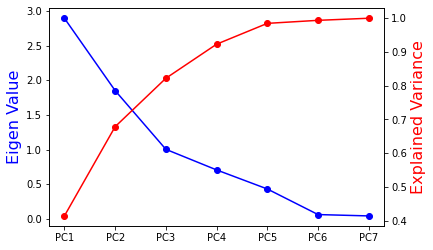

In [8]:
tag = [f"PC{i}" for i in range(1, 8, 1)]
x = np.arange(1, 8, 1)
fig, ax = plt.subplots()
ax.plot(x, eig_val, marker = "o", color = "blue")
ax.set_xticks(x)
ax.set_xticklabels(tag)
ax.set_ylabel("Eigen Value", color = "blue", fontsize = 16)

explained_var = np.cumsum(eig_val) / np.sum(eig_val)
ax2 = ax.twinx()
ax2.plot(x, explained_var, marker = "o", color = "red")
ax2.set_ylabel("Explained Variance", color = "red", fontsize = 16)
plt.show()

From this chart, we can observe that the eigenvalue becomes less than 1 starting from the 4th principal components. Also, we can explain over 80% variance after we select first three principal components. Based on Kaiser Criterion and over 80% of variance we can explain, <font color = "blue">we will retain three principal components</font>.

### Correlation betweeen Principal Components and Original Variable
Now, we form a correlation matrix between principal components and original variable. By during this, we can identify <font color = "blue">how our principal components are mainly composed</font>, and then we can identify the <font color = "blue">relative importance of our original variables</font>.

In [8]:
num_std_arr = np.array(num_n)

# project the orignial point to new axis 
project_point = []
for i in range(len(num_std_arr)):
    temp = []
    for j in range(len(eig_vec)):
        temp.append(np.sum(num_std_arr[i] * eig_vec[j]))
    project_point.append(temp)

# compute correlation between original points and new points
corr_pc_ori = []
for i in range(7):
    temp = []
    for j in range(7):
        temp.append(np.corrcoef(np.array(project_point).T[i], np.array(num_n).T[j])[0][1])
    corr_pc_ori.append(temp)

corr_pc_ori = pd.DataFrame(np.round(corr_pc_ori, 2), columns = var, index = tag)
corr_pc_ori

,Views Count,Citation Count,Field-Weighted Citation Impact,Scholarly Output,Academic-Corporate Collaboration (%),Citations per Publication,International Collaboration (%)
PC1,0.97,0.98,0.07,0.98,0.03,0.13,0.02
PC2,0.07,0.01,-0.82,0.10,-0.25,-0.82,-0.65
PC3,0.02,0.00,0.14,0.01,-0.94,-0.10,0.31
PC4,-0.03,0.02,0.30,-0.03,-0.22,0.31,-0.69
PC5,-0.01,0.02,-0.46,-0.03,-0.11,0.45,0.05
PC6,-0.21,0.10,-0.00,0.11,0.01,-0.00,-0.01
PC7,0.04,-0.16,0.02,0.14,0.02,-0.00,0.00


Through this correlation matrix, we can clearly observe that the first principle component is mainly formed by <font color = "red">Views Count, Citation Count and Scholarly Output</font>. The second principle component is mainly formed by <font color = "red">FWCI and Citation per Publication</font>. The third principle component is formed by <font color = "red">Academic-Corporate Collaboration</font>.

After that, we know that with more publication, you will have more views count and more citation count. Therefore, increase in Scholarly Output will lead to increase in Views Count and Citation Count. So we will select <font color = "red">Scholarly Output</font> as the most important index. Next, since increase in Citation per Publication will lead to increase in FWCI, we will define <font color = "red">citation per publication </font> as our secondly important index. Lastly, <font color = "red">Academic-Corporate Collaboration</font> will be our thirdly important index.

By using this result and explained variance provided by each principal components, we can define our new index <font color = "red">Publication Performance (PP)</font> as 

$$PP = 0.506  \; stdz(SO) + 0.33  \; stdz(CpP) + 0.173 \; stdz(ACC)$$

where $stdz(x) = \frac{x - mean(x)}{std(x)}$

## Result <a class = "anchor" id = "result"></a>
### By department
We can now have top 5 department of the publication performance

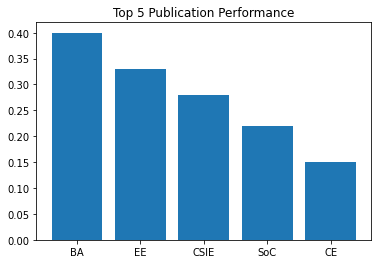

In [10]:
data_clean = data.loc[~(data == "").all(axis = 1)]
def stdlize(df):
    columns = ["Views Count", "Citation Count", "Field-Weighted Citation Impact",
        "Scholarly Output", "Academic-Corporate Collaboration (%)", "Citations per Publication",
        "International Collaboration (%)"]
    for i in columns:
        m_v = df[i].apply(pd.to_numeric).mean()
        s_v = df[i].apply(pd.to_numeric).std()
        df[i] = (df[i].apply(pd.to_numeric) - m_v) / s_v
stdlize(data_clean)

def calculate_perform(df):
    columns = ["Scholarly Output", "Citations per Publication",
     "Academic-Corporate Collaboration (%)"]
    dep = set(data_clean["Entity"])
    value_by_dep = []
    for i in dep:
        df_dep = df[df["Entity"] == i]
        sum = []
        for j in columns:
            sum.append(df_dep[j].apply(pd.to_numeric).mean())
        index = 0.506 * sum[0] + 0.33 * sum[1] + 0.173 * sum[2]
        value_by_dep.append([round(index, 2), i])
    return value_by_dep
value_by_dep = sorted(zip(calculate_perform(data_clean)), reverse = True)[1:]
dep = [i[0][1] for i in list(value_by_dep)]
value = [i[0][0] for i in list(value_by_dep)]

dep_abbr = ["BA", "EE", "CSIE", "SoC", "CE"]
fig, ax = plt.subplots()
ax.bar(dep_abbr, value[:5])
ax.set_title("Top 5 Publication Performance")
plt.show()


As a result, we can see that Department of Business Administration has the best publication performance in NTPU, followed by Department of Electrical Engineering, Department of Computer Science and Information Engineering, Graduate School of Criminology and Department of Communication Engineering. <font color = "blue">It's a surprsing result as NTPU is famous for it College of Business. However, we find out that the publication performance of Engineering Institute is actually better than most of the department in College of Business.</font>

### By Subject
Next, we will check the publication performance of NTPU in different subject

In [10]:
def calculate_perform_sub(df):
    columns = ["Scholarly Output", "Citations per Publication",
     "Academic-Corporate Collaboration (%)"]
    sub = set(data_clean["subject"])
    value_by_sub = []
    for i in sub:
        df_sub = df[df["subject"] == i]
        sum = []
        for j in columns:
            sum.append(df_sub[j].apply(pd.to_numeric).mean())
        index = 0.506 * sum[0] + 0.33 * sum[1] + 0.173 * sum[2]
        value_by_sub.append([round(index, 2), i])
    return value_by_sub
value_by_sub = sorted(zip(calculate_perform_sub(data_clean)), reverse = True)
subb = [i[0][1] for i in list(value_by_sub)]
value_s = [i[0][0] for i in list(value_by_sub)]


df_result_sub = pd.DataFrame({
    "Subject" : subb,
    "Publication Performance" : value_s
})
print(df_result_sub)

                       Subject  Publication Performance
0     Engineering & Technology                     0.15
1             Natural Sciences                     0.08
2     Life Sciences & Medicine                     0.03
3             Art & Humanities                    -0.11
4  Social Science & Management                    -0.15


Bang, we have a significant achievement in Engineering & Technology comparing to Social Science, which should be the subject that we are good at. This means that maybe the department in College of Business need to put more emphasis on researching.

# Conclusion
Through the help of PCA, we are able to extract meaningful and important indices from many of them. This really helps us to understand the publication performance in NTPU better and more clearly.